Importing Necessary Libraries

In [20]:
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


## parsing our stock market dataset
stock_dataset = "^DJI.csv"
stock_data = pd.read_csv(stock_dataset)

## removing our null values from the dataset
stock_data = stock_data.dropna()
stock_data = stock_data.dropna(axis=1)
stock_data = stock_data.dropna(how='all')

stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,36321.589844,36595.820313,36246.449219,36585.058594,36585.058594,347930000
1,2022-01-04,36636.000000,36934.839844,36636.000000,36799.648438,36799.648438,435080000
2,2022-01-05,36722.601563,36952.648438,36400.390625,36407.109375,36407.109375,462040000
3,2022-01-06,36409.050781,36464.191406,36200.679688,36236.468750,36236.468750,385890000
4,2022-01-07,36249.589844,36382.839844,36111.531250,36231.660156,36231.660156,356110000
...,...,...,...,...,...,...,...
521,2024-01-31,38426.781250,38588.859375,38139.660156,38150.300781,38150.300781,453250000
522,2024-02-01,38175.339844,38522.500000,38106.839844,38519.839844,38519.839844,321830000
523,2024-02-02,38448.101563,38783.621094,38336.570313,38654.421875,38654.421875,379760000
524,2024-02-05,38546.769531,38633.878906,38220.398438,38380.121094,38380.121094,322290000


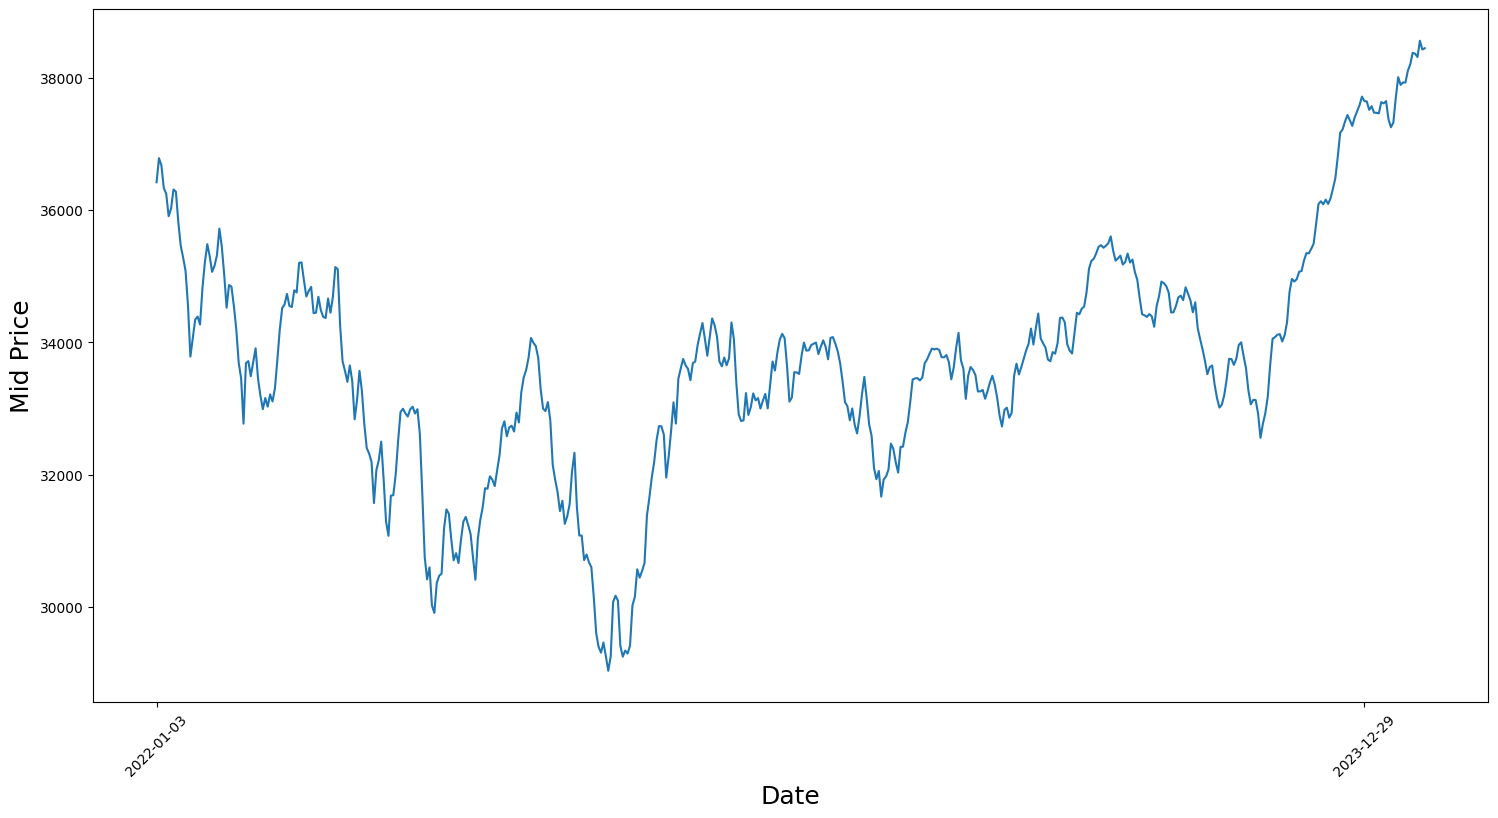

In [21]:
plt.figure(figsize = (18,9))
plt.plot(range(stock_data.shape[0]),(stock_data['Low']+stock_data['High'])/2.0)
plt.xticks(range(0, stock_data.shape[0],500), stock_data['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

Creating Machine Learning Target Value to Set Up Logistic Regression Model

In [22]:
stock_data["Tomorrow"] = stock_data["Close"].shift(-1)
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow
0,2022-01-03,36321.589844,36595.820313,36246.449219,36585.058594,36585.058594,347930000,36799.648438
1,2022-01-04,36636.000000,36934.839844,36636.000000,36799.648438,36799.648438,435080000,36407.109375
2,2022-01-05,36722.601563,36952.648438,36400.390625,36407.109375,36407.109375,462040000,36236.468750
3,2022-01-06,36409.050781,36464.191406,36200.679688,36236.468750,36236.468750,385890000,36231.660156
4,2022-01-07,36249.589844,36382.839844,36111.531250,36231.660156,36231.660156,356110000,36068.871094
...,...,...,...,...,...,...,...,...
521,2024-01-31,38426.781250,38588.859375,38139.660156,38150.300781,38150.300781,453250000,38519.839844
522,2024-02-01,38175.339844,38522.500000,38106.839844,38519.839844,38519.839844,321830000,38654.421875
523,2024-02-02,38448.101563,38783.621094,38336.570313,38654.421875,38654.421875,379760000,38380.121094
524,2024-02-05,38546.769531,38633.878906,38220.398438,38380.121094,38380.121094,322290000,38521.359375


In [23]:
stock_data["Target"] = (stock_data["Tomorrow"] > stock_data["Close"]).astype(int)
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
0,2022-01-03,36321.589844,36595.820313,36246.449219,36585.058594,36585.058594,347930000,36799.648438,1
1,2022-01-04,36636.000000,36934.839844,36636.000000,36799.648438,36799.648438,435080000,36407.109375,0
2,2022-01-05,36722.601563,36952.648438,36400.390625,36407.109375,36407.109375,462040000,36236.468750,0
3,2022-01-06,36409.050781,36464.191406,36200.679688,36236.468750,36236.468750,385890000,36231.660156,0
4,2022-01-07,36249.589844,36382.839844,36111.531250,36231.660156,36231.660156,356110000,36068.871094,0
...,...,...,...,...,...,...,...,...,...
521,2024-01-31,38426.781250,38588.859375,38139.660156,38150.300781,38150.300781,453250000,38519.839844,1
522,2024-02-01,38175.339844,38522.500000,38106.839844,38519.839844,38519.839844,321830000,38654.421875,1
523,2024-02-02,38448.101563,38783.621094,38336.570313,38654.421875,38654.421875,379760000,38380.121094,0
524,2024-02-05,38546.769531,38633.878906,38220.398438,38380.121094,38380.121094,322290000,38521.359375,1


Accuracy: 0.5961538461538461
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.60      1.00      0.75        62

    accuracy                           0.60       104
   macro avg       0.30      0.50      0.37       104
weighted avg       0.36      0.60      0.45       104



c:\Users\leer10\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\leer10\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\leer10\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


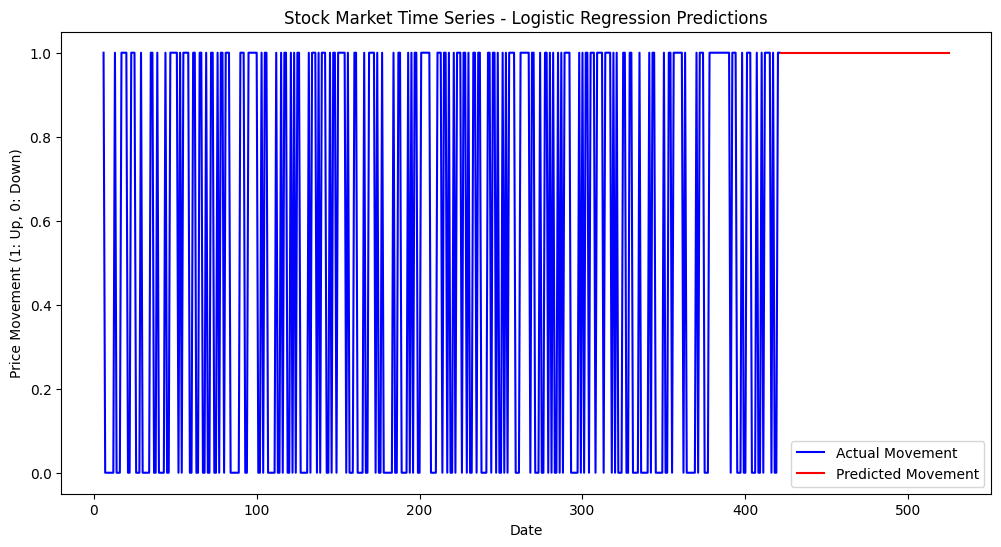

In [24]:
date_index = stock_data["Date"]
closing_prices = stock_data["Close"]
target_values = stock_data["Target"]

# Create a DataFrame with the original time series and the binary target variable
df = pd.DataFrame({"Close": stock_data["Close"], "Target": target_values})

# Feature Engineering: Adding a 7-day moving average
df['MA7'] = df['Close'].rolling(window=7).mean()

# Handling Missing Data: Dropping rows with NaN values
df.dropna(inplace=True)

# Splitting the data into features (X) and target variable (y)
x = df[['MA7']]
y = df['Target']

# Splitting the data into training and testing sets
train_size = int(len(df) * 0.8)  # 80% for training
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=train_size, shuffle=False)

# Creating and training a logistic regression model
model = LogisticRegression(C=0.1)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Displaying classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualizing the predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index[:-len(y_test)], y[:-len(y_test)], label='Actual Movement', color='blue')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted Movement', color='red')
plt.title('Stock Market Time Series - Logistic Regression Predictions')
plt.xlabel('Date')
plt.ylabel('Price Movement (1: Up, 0: Down)')
plt.legend()
plt.show()

